## Project 1 -  Linear Regression
### $y = a + bx$
### Procedure (from Google Classroom)
* Draw 100 random floating number data set x between [0, 10] with python rand library
* Create your linear function for example, set a = 6 and b = 3.5
* Add some noise by y = a + bx + noise, set noise = random number between [0, 10]
* Use python library to build linear regression model, find the linear regression model's coefficent b and intercept a. Output the R^2 for the percentage of total variance explained by the linear regression model.
*  Build your own linear regression model by solving the coefficient b and intercept a, then calculate the R^2
*  Discuss the relation of R^2 with data distribution by varying the noise range.
---

### Work


First, import the necessary modules for this problem:
* `numpy` for data manipulation
* `scikit-learn` for linear regression
* `matplotlib` for plotting data and models 

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


Draw a data set `x` of 100 random floating point numbers from $[0, 10]$

In [2]:
x = np.random.rand(100) * 10

Create sample data for your linear function in the form $y = a + bx$
* For this example, set $a = 6$ and $b = 3.5$
* Add noise: $y = a + bx + \text{noise}$, where noise is equal to a random number from $[0, 10]$

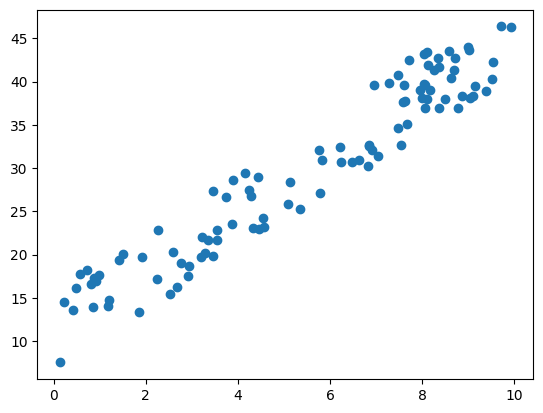

In [3]:
a = 6
b = 3.5
noise = np.random.rand(100) * 10

y = a + b * x + noise

# display x and y on a scatterplot:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

Use `scikit-learn` to build a linear regression model.
* Find the linear regression model's coefficient $b$ and intercept $a$.
* Output the $R^2$ for the percentage of total variance explained by the linear regression model.

Going to use the `LinearRegression` function to create a least-squares regression line (LSRL)

Predicted a: 11.760816408768854
Predicted b: 3.285962291727553
y = 11.760816408768854 + 3.285962291727553x


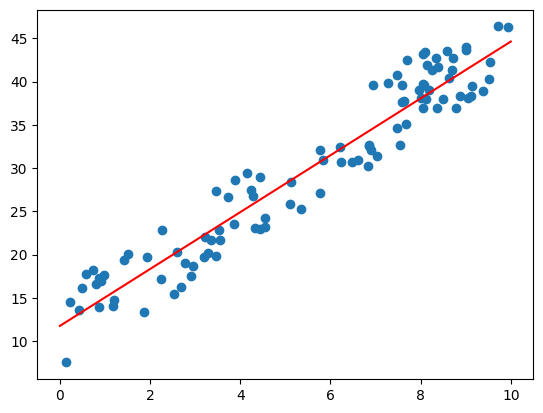

R^2: 0.9210679787895251


In [4]:
# must reshape x to 1 column since there is only 1 feature:
reg_model = LinearRegression().fit(x.reshape(-1, 1), y)

# get intercept a and coefficient b:
reg_model_a = reg_model.intercept_
reg_model_b = reg_model.coef_[0]

# display these results and final equation for regression line:
print(f"Predicted a: {reg_model_a}")
print(f"Predicted b: {reg_model_b}")
print(f"y = {reg_model_a} + {reg_model_b}x")

# display regression line on scatterplot:
fig, ax = plt.subplots()
ax.scatter(x, y)
reg_lsrl_x = np.linspace(0, 10, 2)
reg_lsrl_y = reg_model_a + reg_model_b * reg_lsrl_x
ax.plot(reg_lsrl_x, reg_lsrl_y, color="red")
plt.show()

# find and display R^2:
reg_model_r_sq = reg_model.score(x.reshape(-1, 1), y)
print(f"R^2: {reg_model_r_sq}")

Build your own linear regression model by solving the coefficient $b$ and intercept $a$, then calculate the $R^2$.

* For a least-squares regression line $y = a + bx$:

  $b = \frac{N\sum(xy) - \sum{x}\sum{y}}{N\sum(x^2) - (\sum{x})^2}$

  $a = \frac{\sum{y} - b\sum{x}}{N}$

  Where $N$ is the number of inputs.

* $R^2$ is defined as $(1 - \frac{\sum((y - \hat{y})^2)}{\sum((y - \bar{y})^2)})$
  
  Where $\hat{y}$ is the predicted $y$ value, and $\bar{y}$ is the mean of all $y$ values

Predicted a: 11.760816408768804
Predicted b: 3.285962291727562
y = 11.760816408768804 + 3.285962291727562x


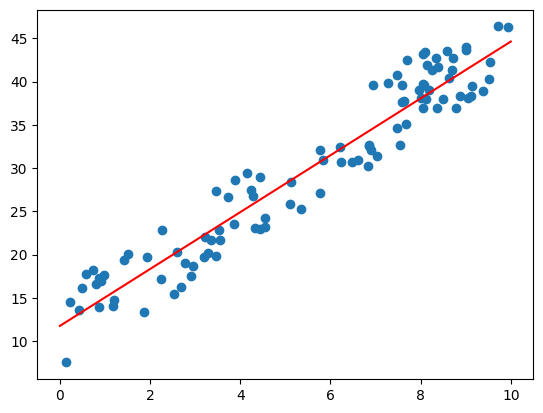

R^2: 0.9210679787895252


In [5]:
N = 100

# use formulas from above to find b and a:
calc_b = (N * np.sum(x * y) - np.sum(x) * np.sum(y))/(N * np.sum(x ** 2) - (np.sum(x)) ** 2)
calc_a = (np.sum(y) - calc_b * np.sum(x)) / N

# display these results and final equation for regression line:
print(f"Predicted a: {calc_a}")
print(f"Predicted b: {calc_b}")
print(f"y = {calc_a} + {calc_b}x")

# display calculated regression line on scatterplot:
fig, ax = plt.subplots()
ax.scatter(x, y)
calc_lsrl_x = np.linspace(0, 10, 2)
calc_lsrl_y = calc_a + calc_b * calc_lsrl_x
ax.plot(calc_lsrl_x, calc_lsrl_y, color="red")
plt.show()

# use formula from above to find R^2 and display it:
calc_pred_y = calc_b * x + calc_a
mean_y = np.mean(y)
calc_r_sq = 1 - (np.sum((y - calc_pred_y) ** 2) / np.sum((y - mean_y) ** 2))
print(f"R^2: {calc_r_sq}")

Discuss the relation of $R^2$ with data distribution by varying the noise range:

At larger amounts of noise in $y$, with a constant range of $x$ values, $R^2$ drastically decreases. In this way, $R^2$ is inversely related to the noise in $y$.